<p style="font-size: 24px;">Ayush Mittal <br>
Task - Prediction using Unsupervised ML <br>
GRIP - The Sparks foundation
</p>


In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('Iris - Iris.csv')


In [5]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
x = df.iloc[:,[1,2,3,4]].values

In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
y = df['Species'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2)

In [10]:
# using Elbow method for optimum value of k

err = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(x)
  err.append(kmeans.inertia_)

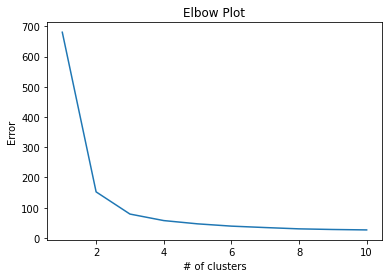

In [11]:
plt.plot(range(1,11),err)
plt.title('Elbow Plot')
plt.xlabel('# of clusters')
plt.ylabel('Error')
plt.show()

<p style="font-size: 18px;">Here we can see, the elbow-like shape is formed at k=3 which is the optimum value.</p>

In [13]:
# let's implement k-means cluster for k=3

k3 = KMeans(n_clusters=3)
pred = k3.fit_predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
k3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

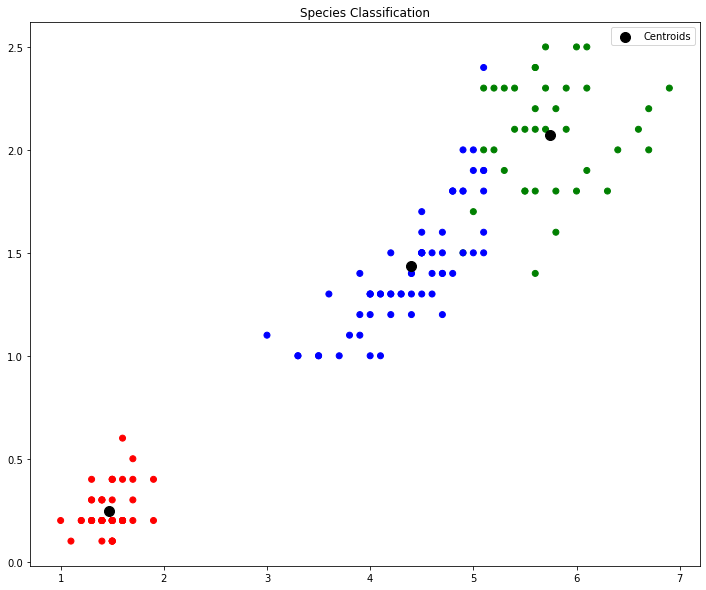

In [46]:
plt.figure(figsize=(12,10))
color = np.array(['red','blue','green'])
pred_y = np.choose(pred, [1, 0, 2]).astype(np.int64)
plt.scatter(x[:,2], x[:,3], c=color[pred_y])
plt.scatter(k3.cluster_centers_[:, 2], k3.cluster_centers_[:,3], s = 100, c = 'black', label = 'Centroids',)
plt.title('Species Classification')
plt.legend()
plt.show()


In [44]:
print('Accuracy :- ',accuracy_score(pred_y,y))

Accuracy :-  0.8933333333333333


In [45]:
confusion_matrix(pred_y,y)

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)


<p style="font-size: 18px;">So here we have got the clusters for different species with 89.33% accuracy score.</p>